In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from agusf import logistic_regresion_train

# Import the dataset iris_dirty.csv from this repo into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [2]:
data=pd.read_csv('iris_dirty.txt', names=['sepal_length','sepal_width','petal_length','petal_width','class'])

# Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.


In [3]:
data.head()
#we can see the correct name of our columns

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [4]:
data.info()
#we can see there is a null in column sepal_width
#the columns petal_length are object and shold be a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
data.describe()
#we can see that dont have any cero but there is a outlier un sepal_length

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [6]:
data['sepal_length'].value_counts()
#that column have an outlier

5.0     10
5.1      9
6.3      9
6.7      8
5.7      8
6.4      7
5.5      7
5.6      6
5.4      6
6.1      6
6.0      6
5.8      6
4.9      6
6.5      5
4.8      5
6.9      4
5.2      4
4.6      4
6.2      4
7.7      4
5.9      3
4.4      3
6.8      3
7.2      3
4.7      2
6.6      2
7.0      2
7.3      1
7.9      1
7.4      1
5.3      1
7.6      1
7.1      1
4.3      1
4.5      1
58.0     1
Name: sepal_length, dtype: int64

In [7]:
data['sepal_width'].value_counts()
#all seems ok

3.0    26
3.2    14
2.8    14
3.1    12
3.4    12
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

In [8]:
data['petal_length'].value_counts()
#all seems ok

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     6
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal_length, dtype: int64

In [9]:
data['petal_width'].value_counts()
#we need change type to float, and let only the number

2 mm     28
13 mm    13
18 mm    12
15 mm    12
14 mm     9
23 mm     8
10 mm     7
4 mm      7
3 mm      7
1 mm      6
21 mm     6
20 mm     6
12 mm     5
19 mm     5
16 mm     4
25 mm     3
22 mm     3
24 mm     3
11 mm     3
17 mm     2
6 mm      1
5 mm      1
Name: petal_width, dtype: int64

In [10]:
data['class'].value_counts()
#we need fix the spelling errors.

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

# Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.

In [11]:
#check duplicates
data.shape

(151, 5)

In [12]:
data_test=data.drop_duplicates()
data_test.shape
#we can see that there is duplicate data

(148, 5)

In [13]:
#drop duplicates.
data = data_test

In [14]:
#check the mean of column
mean_sepal_width = data['sepal_width'].mean()
mean_sepal_width

3.0557823129251713

In [15]:
#As it is a good value with respect to the others, we use it to fill in the nulls.
data['sepal_width'].fillna(mean_sepal_width, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


In [16]:
#we need fix column class 
def change_class(x):
    if x in['Iris-setsoa']:
        return 'Iris-setosa'
    else:
        return x

data['class']=data['class'].apply(change_class)
data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: class, dtype: int64

# Bring all columns to centimeter length. Before, transform any column to numeric if necessary.

In [17]:
#transform petal_width column to float
#first need take only the num part
data['petal_width'] = data['petal_width'].str[:-3]
data['petal_width']

0       2
1       2
2       2
3       2
4       2
       ..
146    23
147    19
148    20
149    23
150    18
Name: petal_width, Length: 148, dtype: object

In [18]:
#now transform to float
data['petal_width'] = data['petal_width'].astype(float)
data['petal_width'].dtype

dtype('float64')

In [19]:
#now can puto the column in cm
data['petal_width'] = data['petal_width']/10
data['petal_width'].value_counts()

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
1.2     5
1.9     5
0.1     4
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

# Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.


In [20]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.055782,3.789189,1.213514
std,4.365089,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

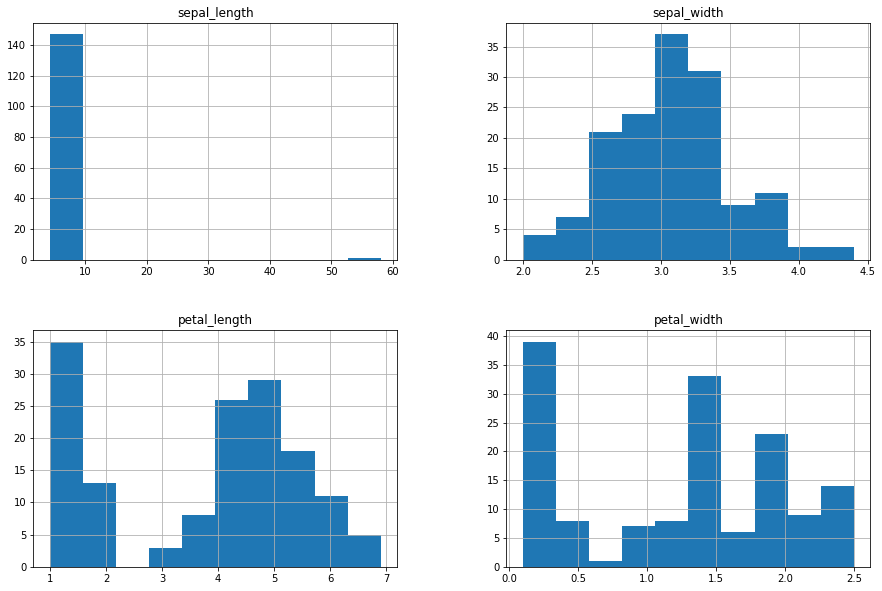

In [21]:
data.hist(figsize=(15,10))

In [22]:
#It seems that the outlier we have is due to an error at the time of writing, 
#for this reason we are not going to eliminate it, we are going to correct it
def change_value(x):
    if x == 58:
        return 58/10
    else:
        return x

data['sepal_length']=data['sepal_length'].apply(change_value)
data['sepal_length'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
4.9     4
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

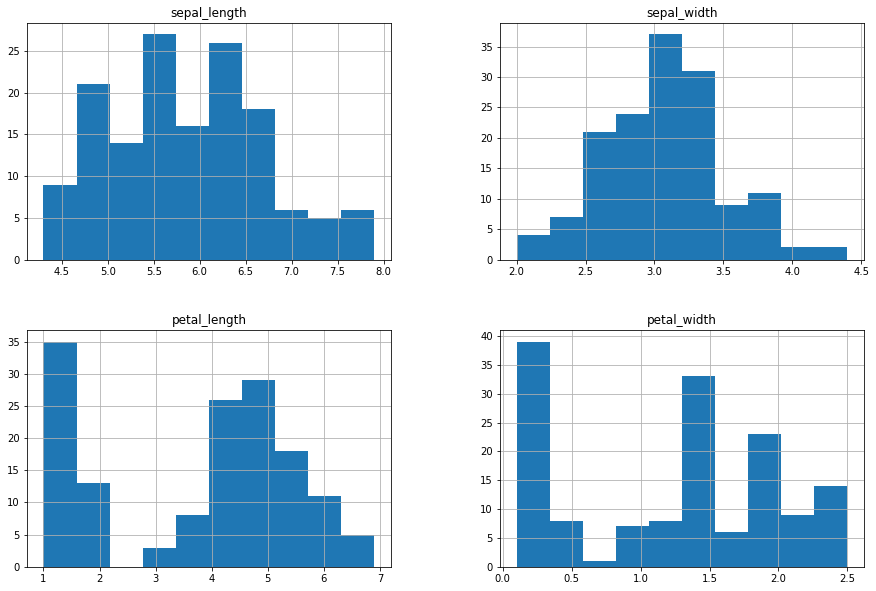

In [23]:
data.hist(figsize=(15,10))

# Plot a correlation matrix with a heatmap between the numeric features.

In [24]:
corr_data=data.drop(['class'],axis=1) 
corre_matrix=corr_data.corr()
corre_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109319,0.869281,0.814322
sepal_width,-0.109319,1.000000,-0.424050,-0.360508
petal_length,0.869281,-0.424050,1.000000,0.961975
petal_width,0.814322,-0.360508,0.961975,1.000000


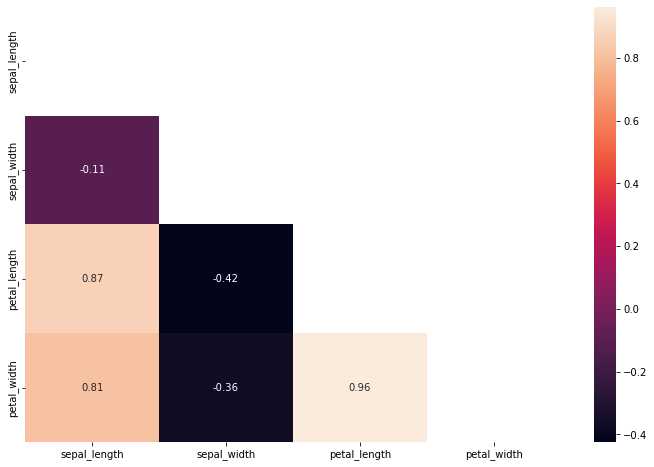

In [25]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax= plt.subplots(figsize=(12,8))
ax= sns.heatmap(corre_matrix, mask=mask, annot=True)

# Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.


In [26]:
#preparing our data
X = data.drop(['class'],axis=1) 
y = data['class']

#split our data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)
#apply and train logistic regresion
model=LogisticRegression(max_iter=500)
model.fit(X_train,y_train)
#calculate accuracy
y_test_pred=model.predict(X_test)
print("Accuracy of LogisticRegresion:",accuracy_score(y_test, y_test_pred))

Accuracy of LogisticRegresion: 0.9333333333333333


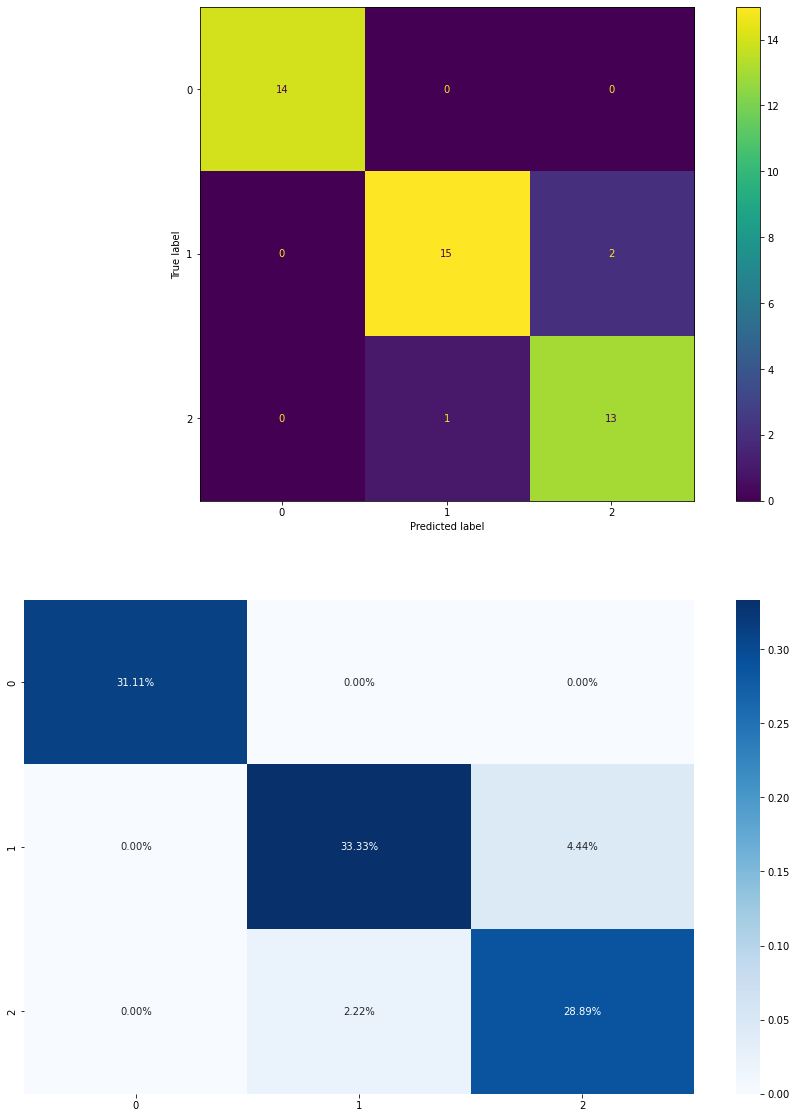

In [27]:
#calculate confusion matrix and plot
fig, (ax) = plt.subplots(2,1, figsize=(15, 20))
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot(ax=ax[0]);
#confusion matrix heatmap
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%',cmap='Blues', ax=ax[1]);

# BONUS: Use all the rows of your data and your trained model to predict the flower classes. Then create pairwise scatterplots between all four features (6 in total) in which you color the dots depending which predicted flower class they belong to. Try to make out distinct clusters in those plots.

Accuracy with all data of LogisticRegresion: 0.972972972972973


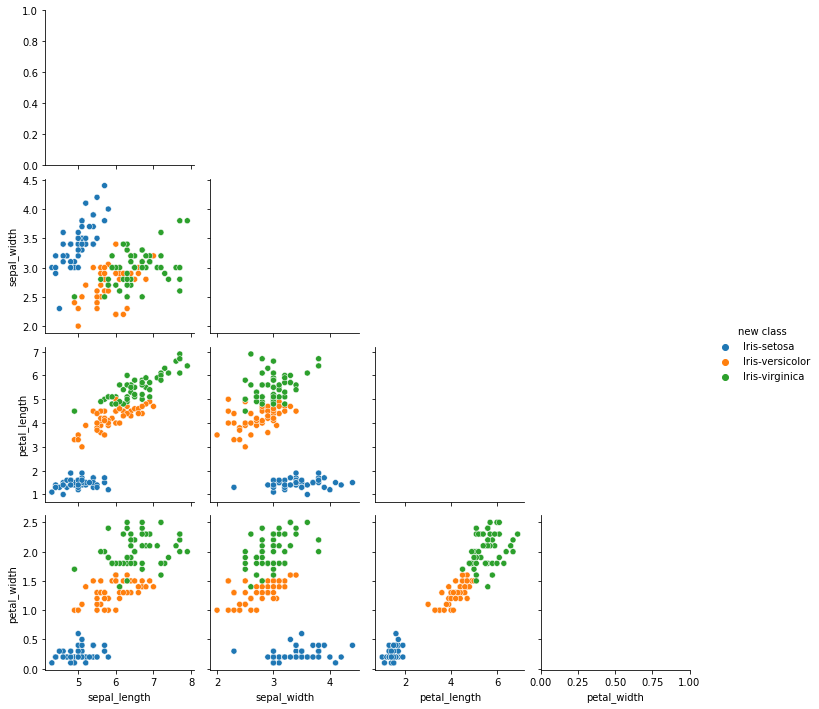

In [28]:
y_total_pred=model.predict(X)
print("Accuracy with all data of LogisticRegresion:",accuracy_score(y, y_total_pred))

X['new class'] = y_total_pred

sns.pairplot(X, hue='new class', corner=True, diag_kind='None');


